In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def load_dataset(file, split_test, split_val): #taken from the colab tutorial
  
    column_names = ["tau1", "tau2", "tau3", "tau4", "p1","p2","p3","p4","g1","g2","g3","g4","label"]
    df = pd.read_csv(file, names=column_names, header=None)
    df_arr = df[1:].apply(pd.to_numeric).values # NumPy array of the df values
    np.random.shuffle(df_arr)
    
    dataset_x = df_arr[:,:-1]
   
    dataset_y = df_arr[:,-1]

    # Number of instances (rows) in the dataset
    num_instances = len(df_arr)
   
    test_size = int(num_instances * split_test)
    val_size = int(num_instances * split_val)
    train_size = num_instances - test_size - val_size

    train_x = dataset_x[:train_size]
    val_x = dataset_x[:val_size]
    train_y = dataset_y[:train_size]
    val_y = dataset_y[:val_size]

    test_x = dataset_x[train_size:]
    test_y = dataset_y[train_size:]

    return train_x, train_y, test_x, test_y, val_x, val_y

In [25]:
train_x, train_y, test_x, test_y, val_x, val_y= load_dataset("dataset.csv", split_test=0.20, split_val = 0.10)

In [26]:
train_x_norm = (train_x.astype(np.float)-np.min(train_x.astype(np.float)))/(np.max(train_x.astype(np.float))-np.min(train_x.astype(np.float)))

/var/folders/0x/mm7r_fbj0p32znrwv20g08f80000gn/T/ipykernel_585/2256125752.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_x_norm = (train_x.astype(np.float)-np.min(train_x.astype(np.float)))/(np.max(train_x.astype(np.float))-np.min(train_x.astype(np.float)))


In [272]:
train_x_norm

len(train_x_norm[0])

12

In [228]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [229]:
def loss(y, y_pred):
    loss = -np.mean(y*(np.log(y_pred)) - (1-y)*np.log(1-y_pred))
    return loss

In [230]:
def gradients(X, y, y_pred):
    
    m = X.shape[0]
    dw = (1/(len(train_x)))*np.dot(X.T, (y-y_pred))
    
    return dw

In [241]:
def train(X, y, bs, epochs, lr, w_all):
    
    n = len(X[0])
    m = len(X)
   
    w_b = w_all[1:13]  
    b = w_all[0]
        

    y = y.reshape(m,1)
    losses = []
    
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):

            xb = X[i*bs:i*bs + bs]
            yb = y[i*bs:i*bs + bs]
            

            y_pred = sigmoid(np.dot(xb, w) + b)
    
            dw  = gradients(xb, yb, y_pred)
            w_b += lr*dw
        

        

        l = loss(y, sigmoid(np.dot(X, w_b) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
   
    return w_b, losses

In [261]:
def predict(X):
    b = w_b[0]
 
    preds = sigmoid(np.dot(X, w_b) + b)
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [264]:
def calc_accuracy(ground_truth_labels, predicted_labels): 
    correct = 0
	# Pairs of the ground truth and predicted labels
    for gt_label, pred_label in zip(ground_truth_labels, predicted_labels):
        if gt_label == pred_label: 
            correct += 1
    return (correct/len(ground_truth_labels))

In [266]:
def conf_matrix(y, y_pred):
    data = {"y_actual": y, "y_predicted": y_pred}
    y_df = pd.DataFrame(data)
    confusion_matrix = pd.crosstab(y_df['y_actual'], y_df['y_predicted'], rownames=['Actual'], colnames=['Predicted'])
    hmap = sns.heatmap(confusion_matrix, annot=True)
    return (confusion_matrix, hmap)

Accuracy of batch size = 64 is 0.4665

Confusion matrix of batch size = 64:
 (Predicted     0     1
Actual               
0.0        1198  2684
1.0         517  1601, <AxesSubplot:xlabel='Predicted', ylabel='Actual'>)


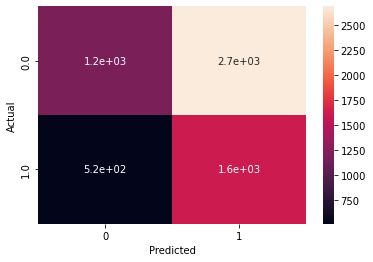

In [303]:
w_all = np.random.normal(0,1,13).reshape(13,1)
w_b, l  = train(train_x_norm, train_y, 64, 100, 0.01, w_all)


small_b = calc_accuracy(val_y,predict(val_x))

small_b_conf = conf_matrix(val_y,predict(val_x))

print("Accuracy of batch size = 64 is",small_b)
print("\nConfusion matrix of batch size = 64:\n", small_b_conf)







Accuracy of batch size = full is 0.3516666666666667

Confusion matrix of batch size = full:
 (Predicted    0     1
Actual              
0.0        113  3769
1.0        121  1997, <AxesSubplot:xlabel='Predicted', ylabel='Actual'>)


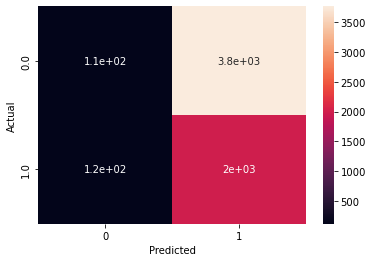

In [304]:
w, l  = train(train_x_norm, train_y, len(train_x), 100, 0.01, w_all)

full_b = calc_accuracy(val_y, predict(val_x))
full_b_conf = conf_matrix(val_y,predict(val_x))

print("\nAccuracy of batch size = full is",full_b)
print("\nConfusion matrix of batch size = full:\n", full_b_conf)


Accuracy of batch size = 64 is 0.31366666666666665

Confusion matrix of batch size = 64:
 (Predicted    0     1
Actual              
0.0        220  3662
1.0        456  1662, <AxesSubplot:xlabel='Predicted', ylabel='Actual'>)


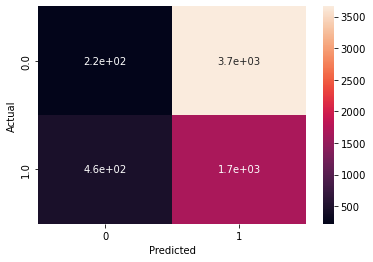

In [305]:
#Question 2.2 uniform dist
w_all = np.random.uniform(0,1,13).reshape(13,1)

w_b, l  = train(train_x_norm, train_y, 64, 100, 0.01, w_all)


small_b = calc_accuracy(val_y,predict(val_x))

small_b_conf = conf_matrix(val_y,predict(val_x))

print("Accuracy of batch size = 64 is",small_b)
print("\nConfusion matrix of batch size = 64:\n", small_b_conf)


Accuracy of batch size = 64 is 0.647

Confusion matrix of batch size = 64:
 (Predicted     0
Actual         
0.0        3882
1.0        2118, <AxesSubplot:xlabel='Predicted', ylabel='Actual'>)


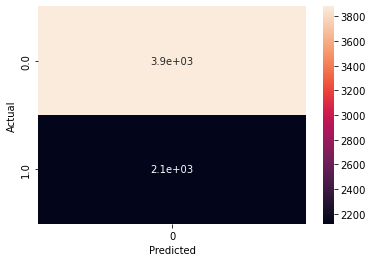

In [310]:
#Question 2.2 zeros
w_all = np.zeros((1,13)).reshape(13,1)
w_b, l  = train(train_x_norm, train_y, 64, 100, 0.01, w_all)


small_b = calc_accuracy(val_y,predict(val_x))

small_b_conf = conf_matrix(val_y,predict(val_x))

print("Accuracy of batch size = 64 is",small_b)
print("\nConfusion matrix of batch size = 64:\n", small_b_conf)